# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san jose del guaviare
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | magadan
Processing Record 7 of Set 1 | le blanc
Processing Record 8 of Set 1 | lihue
Processing Record 9 of Set 1 | baiyin
Processing Record 10 of Set 1 | beipiao
Processing Record 11 of Set 1 | brandon
Processing Record 12 of Set 1 | banda aceh
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | ivdel'
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | muang khong
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | jiagedaqi
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | maturin
Processing Record 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san jose del guaviare,2.5729,-72.6459,24.98,92,98,1.51,CO,1712271133
1,port mathurin,-19.6833,63.4167,26.92,75,100,9.08,MU,1712271097
2,ushuaia,-54.8000,-68.3000,5.81,61,0,1.54,AR,1712271077
3,puerto ayora,-0.7393,-90.3518,27.98,91,57,3.58,EC,1712271134
4,adamstown,-25.0660,-130.1015,22.67,62,100,4.36,PN,1712271082


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san jose del guaviare,2.5729,-72.6459,24.98,92,98,1.51,CO,1712271133
1,port mathurin,-19.6833,63.4167,26.92,75,100,9.08,MU,1712271097
2,ushuaia,-54.8000,-68.3000,5.81,61,0,1.54,AR,1712271077
3,puerto ayora,-0.7393,-90.3518,27.98,91,57,3.58,EC,1712271134
4,adamstown,-25.0660,-130.1015,22.67,62,100,4.36,PN,1712271082


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

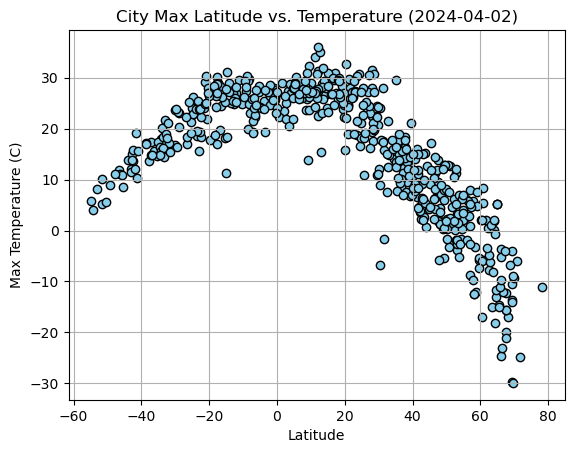

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-04-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

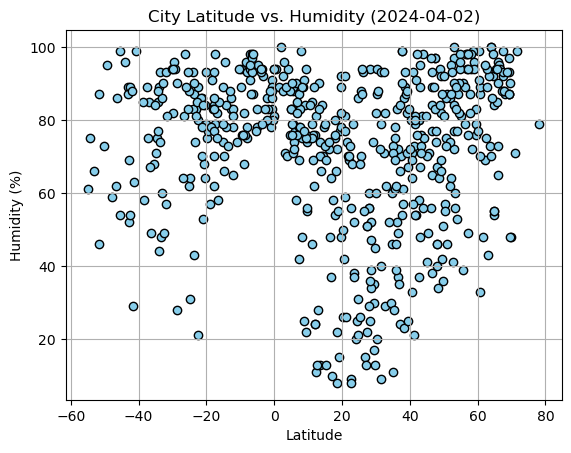

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

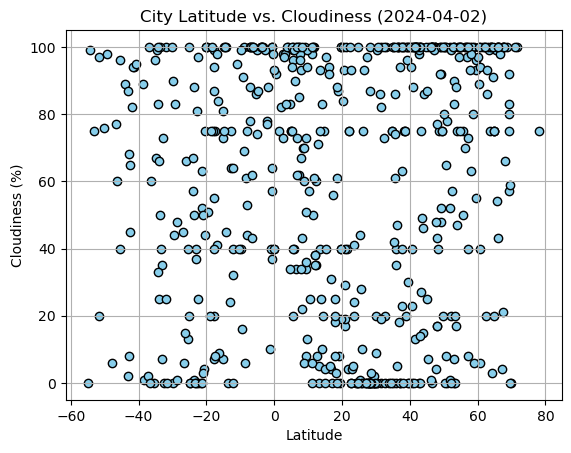

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

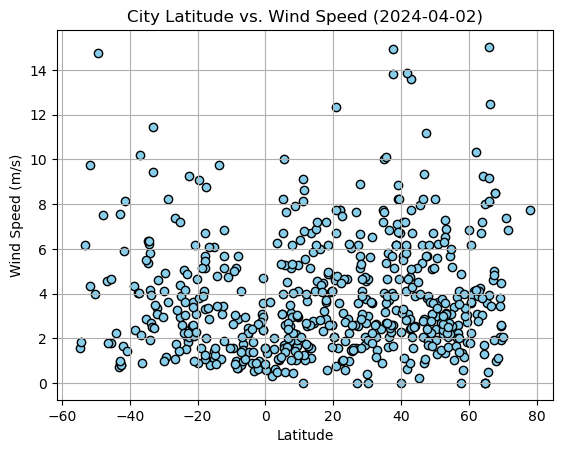

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r', label=line_eq)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')

    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san jose del guaviare,2.5729,-72.6459,24.98,92,98,1.51,CO,1712271133
5,magadan,59.5667,150.8000,-5.82,79,93,3.02,RU,1712271095
6,le blanc,46.6667,1.1667,11.22,84,100,2.88,FR,1712271135
7,lihue,21.9789,-159.3672,27.58,69,75,7.72,US,1712271094
8,baiyin,36.5583,104.2081,9.81,37,100,6.83,CN,1712271135


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,26.92,75,100,9.08,MU,1712271097
2,ushuaia,-54.8000,-68.3000,5.81,61,0,1.54,AR,1712271077
3,puerto ayora,-0.7393,-90.3518,27.98,91,57,3.58,EC,1712271134
4,adamstown,-25.0660,-130.1015,22.67,62,100,4.36,PN,1712271082
14,waitangi,-43.9535,-176.5597,13.79,96,89,2.24,NZ,1712271084


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8090800376024302


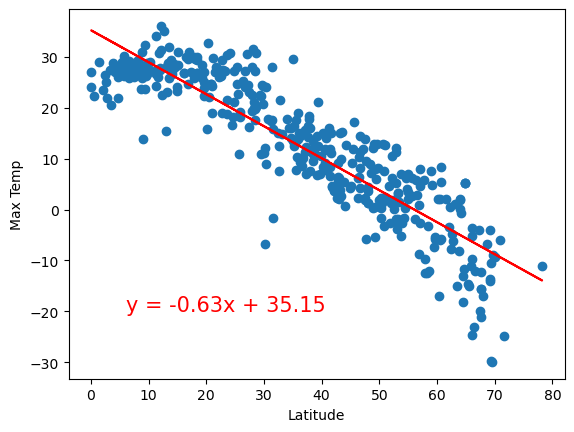

In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values, 'Max Temp', (6,-20))

The r-value is: 0.6434482379496828


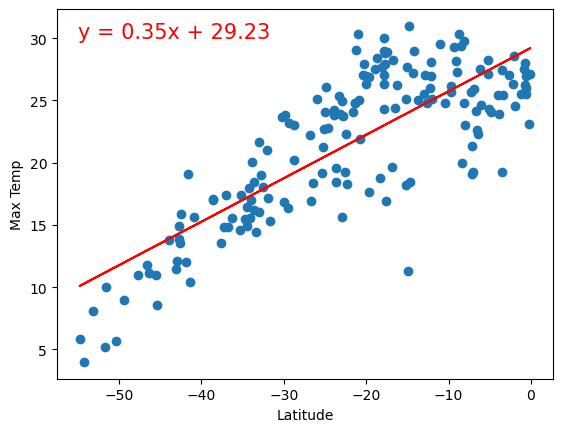

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values,y_values, 'Max Temp', (-55,30))

**Discussion about the linear relationship:** Both plots show a positive correlation between temperature and latitude, indicating that the temperature tends to increase as you move closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0433999966387397


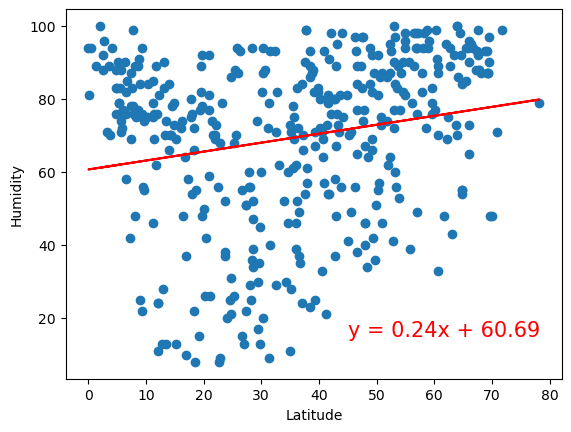

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values,y_values, 'Humidity', (45,15))

The r-value is: 0.0942253519641456


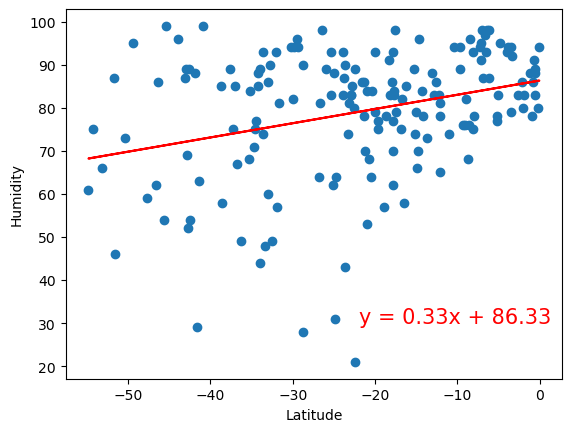

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values,y_values, 'Humidity', (-22,30))

**Discussion about the linear relationship:** The linear regression lots indicate that there is very weak positive correlation between humidity and latitude in both the northern and southern hemispheres. This may show that latitude has little to none influence on humidity levels. There could be other factors that play a more significant role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02970049329209802


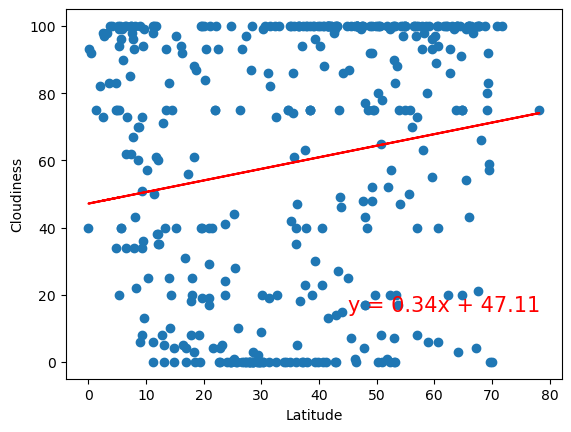

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values,y_values, 'Cloudiness', (45,15))

The r-value is: 0.02886372763919663


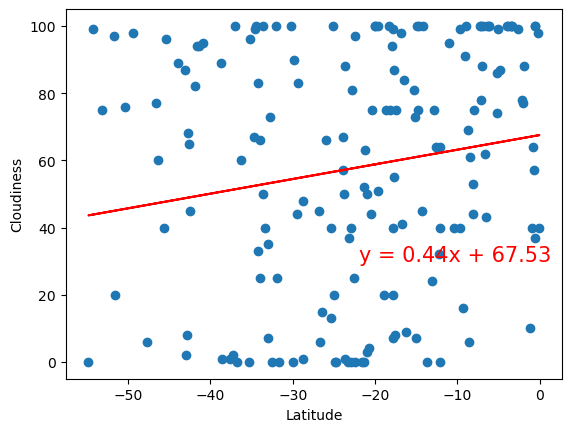

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values,y_values, 'Cloudiness', (-22,30))

**Discussion about the linear relationship:** The linear regression lots indicate that there is very weak positive correlation between cloudiness and latitude in both the northern and southern hemispheres. This may show that latitude has little to none influence on cloudiness levels. There could be other factors that play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010916438470751704


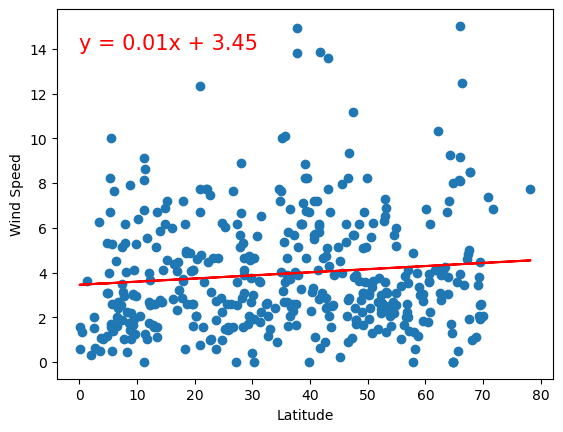

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values,y_values, 'Wind Speed', (0,14))

The r-value is: 0.0863233753182222


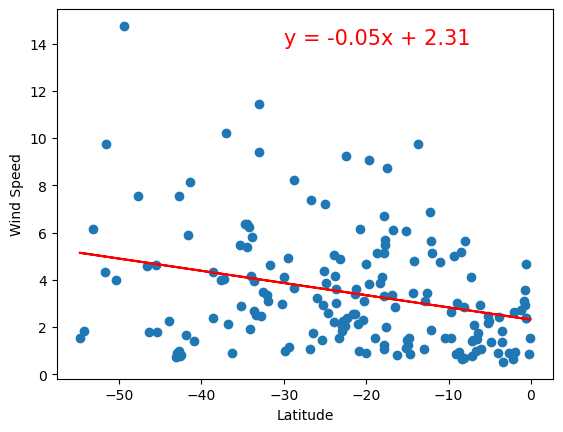

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,14))

**Discussion about the linear relationship:** The linear regression lots indicate that there is very weak positive correlation between wind speed and latitude in both the northern and southern hemispheres. This may show that latitude has little to none influence on wind speed levels. There could be other factors that play a more significant role in determining wind speed levels.